In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

# allow plots to appear directly in the notebook
% matplotlib inline

In [2]:
df_advertising = pd.read_csv("data\\advertising.csv")
df_advertising.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
df_advertising = df_advertising.head(40)
X = df_advertising[['TV']]
y = df_advertising[["Sales"]]

SkLearn_model = LinearRegression()
SkLearn_result = SkLearn_model.fit(X, y)

# print the coefficients
print(SkLearn_result.intercept_)
print(SkLearn_result.coef_)
#Model Interpretation 
#The Interpretation comes out as : y = 6.9748 + 0.05546x

[7.99142087]
[[0.04896291]]


In [30]:

X = df_advertising[['TV']]
y = df_advertising.Sales
print(X.shape)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, train_size=0.5)

print(X_train.shape)
# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)
y_pred_train = lm2.predict(X_train)

# RMSE
print("Train error",np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Test error",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


(40, 1)
(20, 1)
Train error 2.3889816179335313
Test error 1.9244322226523658


In [26]:
from sklearn.linear_model import Ridge, Lasso

ridgeReg = Ridge(alpha=1)
ridgeReg.fit(X_train, y_train)
y_pred = ridgeReg.predict(X_test)
# RMSE
print("Test error",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

lassoReg = Lasso(alpha=0.3, fit_intercept=True)
lassoReg.fit(X_train, y_train)
y_pred = lassoReg.predict(X_test)
# RMSE
print("Test error",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test error 1.9244263486758628
Test error 1.9237484434030971


Train error 0.011915651687034082
Test error 506.34509034258565


c:\Users\trajanod\Anaconda3\envs\transformers\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


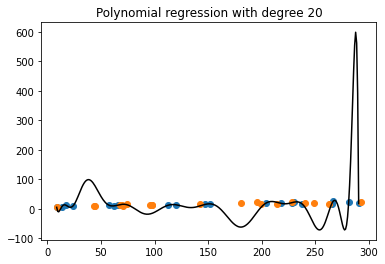

In [36]:
scaler = preprocessing.StandardScaler()
degree = 20
polyreg = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_test)
y_pred_train = polyreg.predict(X_train)
print("Train error", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Test error",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
X = X_train['TV']
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
plt.figure()
plt.scatter(X_train['TV'], y_train)
plt.scatter(X_test['TV'], y_test)
plt.plot(X_seq, polyreg.predict(X_seq), color="black")
plt.title("Polynomial regression with degree " + str(degree))
plt.show()

[0.09090909090909091, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5]
[0.0, 37.06177235954234, 562.8346604460227, -9505.839702192607, 53720.966376477474, -158449.0278154834, 270559.43490072456, -269332.5218797353, 145089.46416085493, -32677.785599879327]
[0.0, 3.706177235954234, 56.28346604460227, -950.5839702192607, 5372.096637647748, -15844.90278154834, 27055.94349007246, -26933.25218797353, 14508.946416085493, -3267.778559987933]


c:\Users\trajanod\Anaconda3\envs\transformers\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


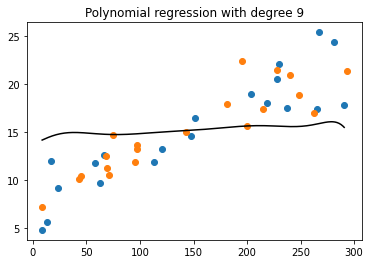

In [9]:
red_c = [1/x for x in range(degree+2,1, -1)]
print(red_c)
print(list(polyreg[2].coef_))
polyreg[2].coef_ = polyreg[2].coef_*.1
print(list(polyreg[2].coef_))
X = X_train['TV']
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
plt.figure()
plt.scatter(X_train['TV'], y_train)
plt.scatter(X_test['TV'], y_test)
plt.plot(X_seq, polyreg.predict(X_seq), color="black")
plt.title("Polynomial regression with degree " + str(degree))
plt.show()

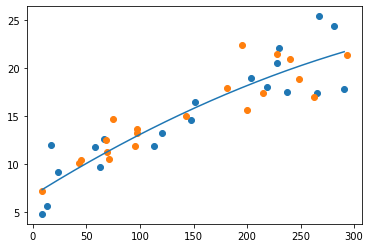

2.3510194011008383
1.7951853801313518


In [10]:
import numpy

mymodel = numpy.poly1d(numpy.polyfit(X, y_train, 2))
myline = numpy.linspace(X.min(), X.max(), 300)
plt.scatter(X, y_train)
plt.scatter(X_test['TV'], y_test)
plt.plot(myline, mymodel(myline))
plt.show()
y_pred = mymodel(X_test)
y_pred_train = mymodel(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1 2.3889816179335317 1.9244322226523658
2 2.3510194011008383 1.7951853801313518
3 2.3445657338346786 1.8193741132041814
4 2.2140828837687745 1.9340163025029795
5 2.208038807231382 1.8847059415563703
6 2.001988977687225 2.412181425191424
7 1.9784174248859971 2.463472862540226
8 1.8732332316613618 2.3952375118970046
9 1.8465297784496808 2.683133617309382


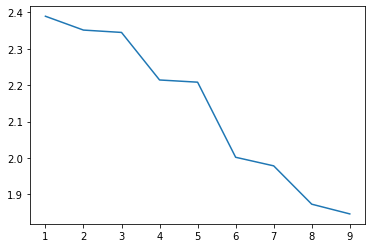

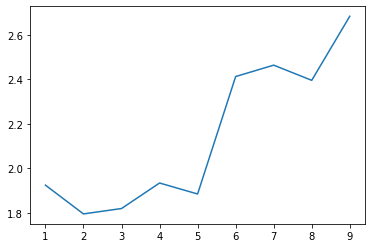

In [11]:
train_l = []
test_l = []
for i in range(1, 10):
    mymodel = numpy.poly1d(numpy.polyfit(X, y_train, i))
    y_pred = mymodel(X_test)
    y_pred_train = mymodel(X_train)
    train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    train_l.append(train)
    test_l.append(test)
    print(i, train, test)
l = numpy.linspace(1, 9, 9)
plt.plot(l, train_l)
plt.show()
plt.plot(l, test_l)
plt.show()

In [12]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ridgeReg = Ridge(alpha=0.1)
degree = 3
polyreg = make_pipeline(PolynomialFeatures(degree), scaler, Ridge(alpha=0.1))
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_test)
y_pred_train = polyreg.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.346962300489941
1.8217560304638818


c:\Users\trajanod\Anaconda3\envs\transformers\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


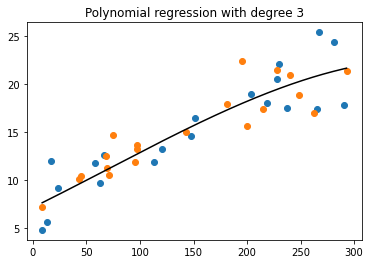

In [13]:
X = X_train['TV']
import matplotlib.pyplot as plt
import numpy as np

X_seq = np.linspace(min(X.min(), X_test['TV'].min()), max(X.max(), X_test['TV'].max()), 300).reshape(-1, 1)
plt.figure()
plt.scatter(X_train['TV'], y_train)
plt.scatter(X_test['TV'], y_test)
plt.plot(X_seq, polyreg.predict(X_seq), color="black")
plt.title("Polynomial regression with degree " + str(degree))
plt.show()